In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
import spacepy.time as spt
import spacepy.omni as om
import spacepy.toolbox as tb


Qin-Denton/OMNI2 data not found in current format. This module has limited functionality.
Run spacepy.toolbox.update(QDomni=True) to download data


In [360]:
err=[]

In [375]:
ticks = spt.tickrange('2002-08-01T00:00:00', '2002-09-01T00:00:00', deltadays = 1./24.)
d = om.get_omni(ticks)

ticks1 = spt.tickrange('2002-09-02T00:00:00', '2002-09-16T00:00:00', deltadays = 1./24.)
d1 = om.get_omni(ticks1)

In [376]:
import numpy as np
from sklearn import svm

In [377]:
Bz=d['BzIMF']
n=d['dens']
Kp=d['Kp']
n=np.size(d['Kp'])
K=np.zeros((n,3))
for i in range (np.size(d['velo'])):
    K[i,0]=d['velo'][i]
    K[i,1]=d['BzIMF'][i]
    K[i,2]=d['dens'][i]
clf = svm.SVR()
Bz1=d1['BzIMF']
n1=d1['dens']
Kp1=d1['Kp']
n1=np.size(d1['Kp'])
K1=np.zeros((n1,3))
for i in range (np.size(d1['velo'])):
    K1[i,0]=d1['velo'][i]
    K1[i,1]=d1['BzIMF'][i]
    K1[i,2]=d1['dens'][i]

In [378]:
models=clf.fit(K,Kp)
y=clf.predict(K1)


C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


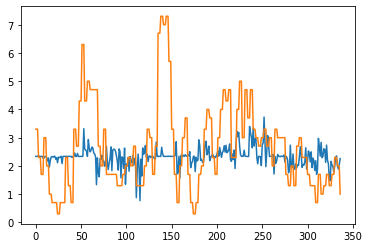

In [379]:
plt.show()
plt.plot(y)
plt.plot(Kp1)

In [380]:
import numpy.linalg as npl 
err=np.append(err,npl.norm(Kp1-y,2)/np.sqrt(n1))

In [414]:
set_ticks=[ [spt.tickrange('2002-01-01T00:00:00', '2002-02-01T00:00:00', deltadays = 1./24.),
             spt.tickrange('2002-02-02T00:00:00', '2002-02-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-02-01T00:00:00', '2002-03-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-03-02T00:00:00', '2002-03-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-03-01T00:00:00', '2002-04-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-04-02T00:00:00', '2002-04-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-04-01T00:00:00', '2002-05-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-05-02T00:00:00', '2002-05-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-05-01T00:00:00', '2002-06-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-06-02T00:00:00', '2002-06-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-06-01T00:00:00', '2002-07-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-07-02T00:00:00', '2002-07-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-07-01T00:00:00', '2002-08-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-08-02T00:00:00', '2002-08-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-08-01T00:00:00', '2002-09-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-09-02T00:00:00', '2002-09-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-09-01T00:00:00', '2002-10-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-10-02T00:00:00', '2002-10-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-10-01T00:00:00', '2002-11-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-11-02T00:00:00', '2002-11-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-11-01T00:00:00', '2002-12-01T00:00:00', deltadays = 1./24.),
        spt.tickrange('2002-12-02T00:00:00', '2002-12-05T00:00:00', deltadays = 1./24.)]
      ]
clf = svm.SVR()

In [426]:
err=[]
for tick in (set_ticks):
    ticks=tick[0]
    ticks1=tick[1]
    
    d = om.get_omni(ticks)
    d1 = om.get_omni(ticks1)

    Kp=d['Kp']
    n=np.size(d['Kp'])
    
    K=np.zeros((n,3))
    for i in range (np.size(d['velo'])):
        K[i,0]=d['velo'][i]
        K[i,1]=d['BzIMF'][i]
        K[i,2]=d['dens'][i]

    Kp1=d1['Kp']
    n1=np.size(d1['Kp'])
    
    K1=np.zeros((n1,3))
    for i in range (np.size(d1['velo'])):
        K1[i,0]=d1['velo'][i]
        K1[i,1]=d1['BzIMF'][i]
        K1[i,2]=d1['dens'][i]
    models=clf.fit(K,Kp)
    y=clf.predict(K1)
    err=np.append(err,npl.norm(Kp1-y,2)/np.sqrt(n1))
print(err)

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

[1.1821126  0.74215916 0.98298997 0.9376982  0.96945357 0.89503402
 1.70563326 1.64209096 2.97564586 1.08446478 0.72050131]


C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
